**EXPLORATORY DATA ANALYSIS - DIABETES DIAGNOSES PREDICTION**

# **EXPLORE DATASET**

In [1]:
#Import libraries
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
# loading the diabetes dataset to a pandas DataFrame
data = pd.read_csv('/content/diabetes.csv')

In [3]:
# printing the first 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# printing the last 5 rows of the dataset
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# number of rows and Columns in this dataset
data.shape

(768, 9)

In [6]:
# columns name in this dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# getting the uniqueness of this dataset
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
# getting information from this dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# separating the data and labels
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']


In [11]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# **DATA QUALITY**

In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**RESULT : NO MISSING VALUE !!!**

In [14]:
data.duplicated().sum()

0

**RESULT : NO DUPLICATED DATA !!!**

# **FEATURES CORRELATION**

In [15]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

500 is rated as 0 and 268 as 1:

**0 ---> Non Diabetic**

**1 ---> Diabetic**

In [16]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [17]:
# define dataframe "Outcome"
data_0 = data[data['Outcome']==0]
data_1 = data[data['Outcome']==1]

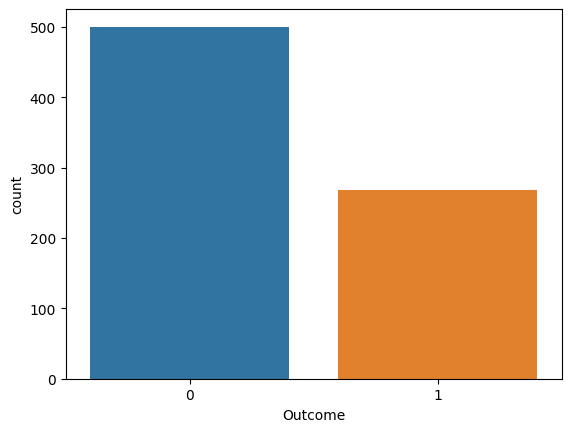

In [18]:
# view amount of each category using barplot
sns.countplot(data= data , x='Outcome',label="Count")
plt.show()

# **Age vs Outcome**

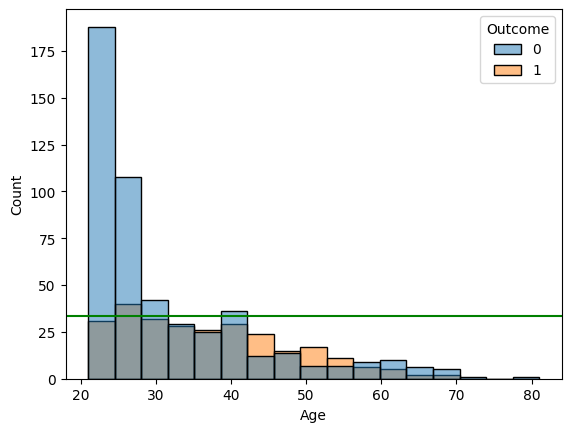

In [19]:
# view the "Age" variable in the "Outcome" dataset using histogram
sns.histplot(data=data, x='Age', hue='Outcome')
plt.xlabel("Age")
plt.ylabel("Count")
plt.axhline(np.mean(data['Age']), color='green', linestyle='solid')
plt.show()

In [20]:
non_diabetic_mean_age = data_0['Age'].mean()
print(f"Average age when patient is diagnosed Non-Diabetes is {non_diabetic_mean_age}")

Average age when patient is diagnosed Non-Diabetes is 31.19


In [21]:
diabetic_mean_age = data_1['Age'].mean()
print(f"Average age when patient is diagnosed Diabetes is {diabetic_mean_age}")

Average age when patient is diagnosed Diabetes is 37.06716417910448


**The incidence of diabetes increases from above the age of 37**

Text(0, 0.5, 'Age')

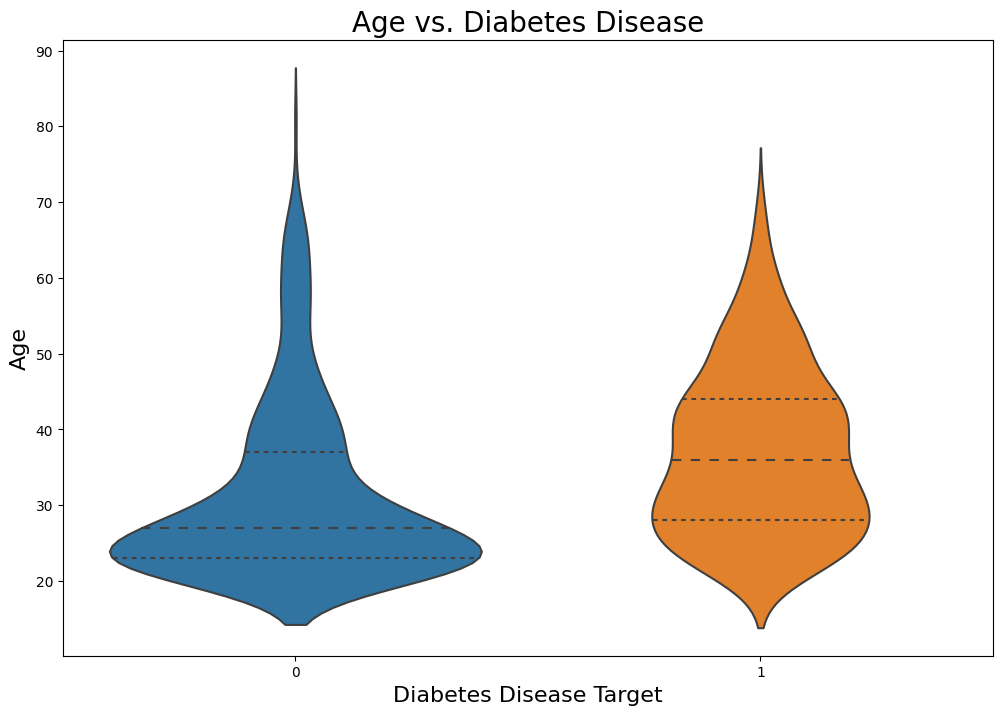

In [22]:
# plot "Age" using violinplot
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Outcome', y= 'Age', inner='quartile', data= data )
plt.title("Age vs. Diabetes Disease",fontsize=20)
plt.xlabel("Diabetes Disease Target", fontsize=16)
plt.ylabel("Age", fontsize=16)

# **Skin Thickness vs Outcome**

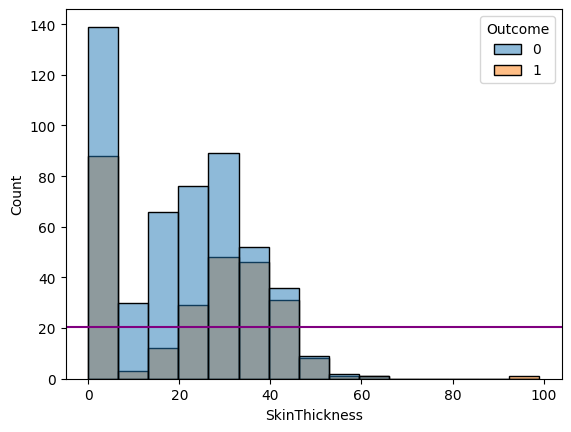

In [23]:
# view the "SkinThickness" variable in the "Outcome" dataset using histogram
sns.histplot(data=data, x='SkinThickness', hue='Outcome')
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.axhline(np.mean(data['SkinThickness']), color='purple', linestyle='solid')
plt.show()

In [24]:
non_diabetic_mean_st = data_0['SkinThickness'].mean()
print(f"Average Skin Thickness when patient is diagnosed Non-Diabetes is {non_diabetic_mean_st}")

Average Skin Thickness when patient is diagnosed Non-Diabetes is 19.664


In [25]:
diabetic_mean_st = data_1['SkinThickness'].mean()
print(f"Average Skin Thickness when patient is diagnosed Diabetes is {diabetic_mean_st}")

Average Skin Thickness when patient is diagnosed Diabetes is 22.16417910447761


**The thickness of the skin of diabetes patients is higher than that of non-diabetes patients**

Text(0, 0.5, 'SkinThickness')

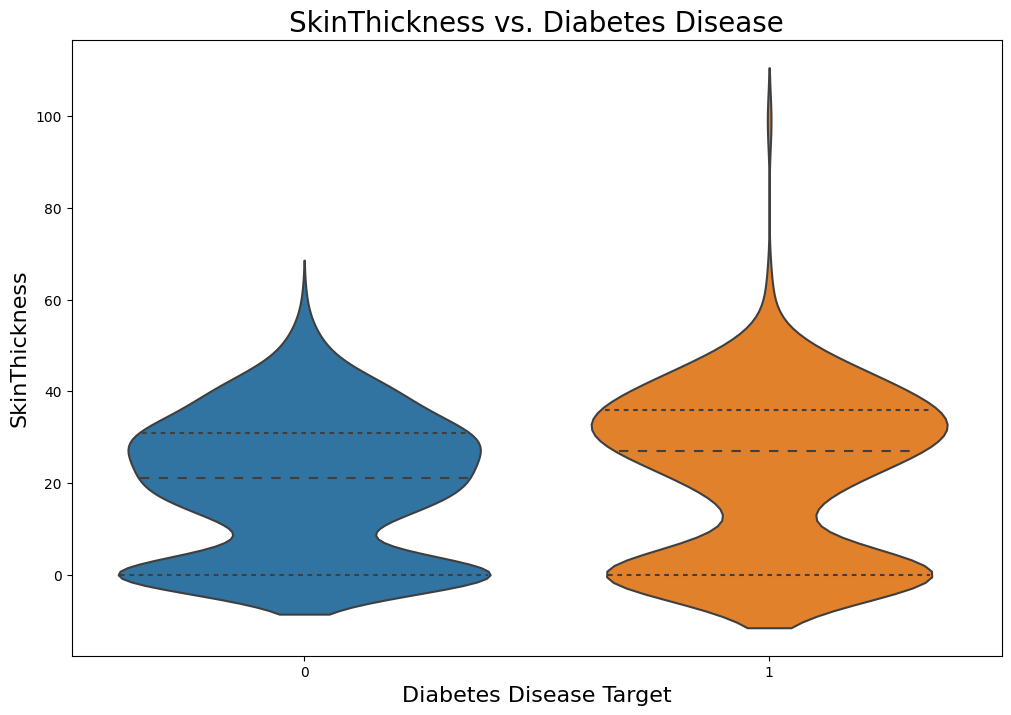

In [26]:
# plot "SkinThickness" using violinplot
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Outcome', y= 'SkinThickness', inner='quartile', data= data )
plt.title("SkinThickness vs. Diabetes Disease",fontsize=20)
plt.xlabel("Diabetes Disease Target", fontsize=16)
plt.ylabel("SkinThickness", fontsize=16)

# **BMI vs Outcome**

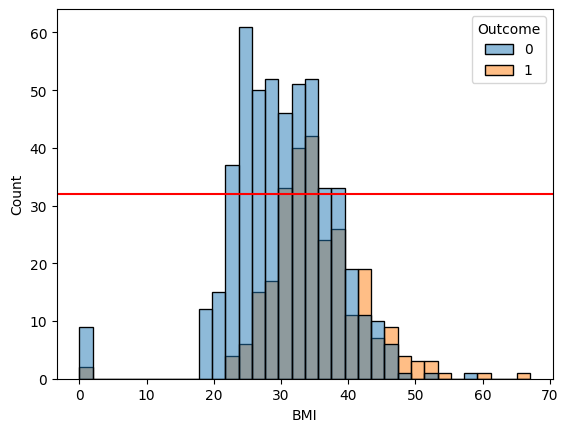

In [27]:
# view the "BMI" variable in the "Outcome" dataset using histogram
sns.histplot(data=data, x='BMI', hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.axhline(np.mean(data['BMI']), color='red', linestyle='solid')
plt.show()

In [28]:
non_diabetic_mean_bmi = data_0['BMI'].mean()
print(f"Average BMI when patient is diagnosed Non-Diabetes is {non_diabetic_mean_bmi}")

Average BMI when patient is diagnosed Non-Diabetes is 30.3042


In [29]:
diabetic_mean_bmi = data_1['BMI'].mean()
print(f"Average BMI when patient is diagnosed Diabetes is {diabetic_mean_bmi}")

Average BMI when patient is diagnosed Diabetes is 35.14253731343284


**BMI is more common in affected diabetes patients than in non-diabetes patients**

Text(0, 0.5, 'BMI')

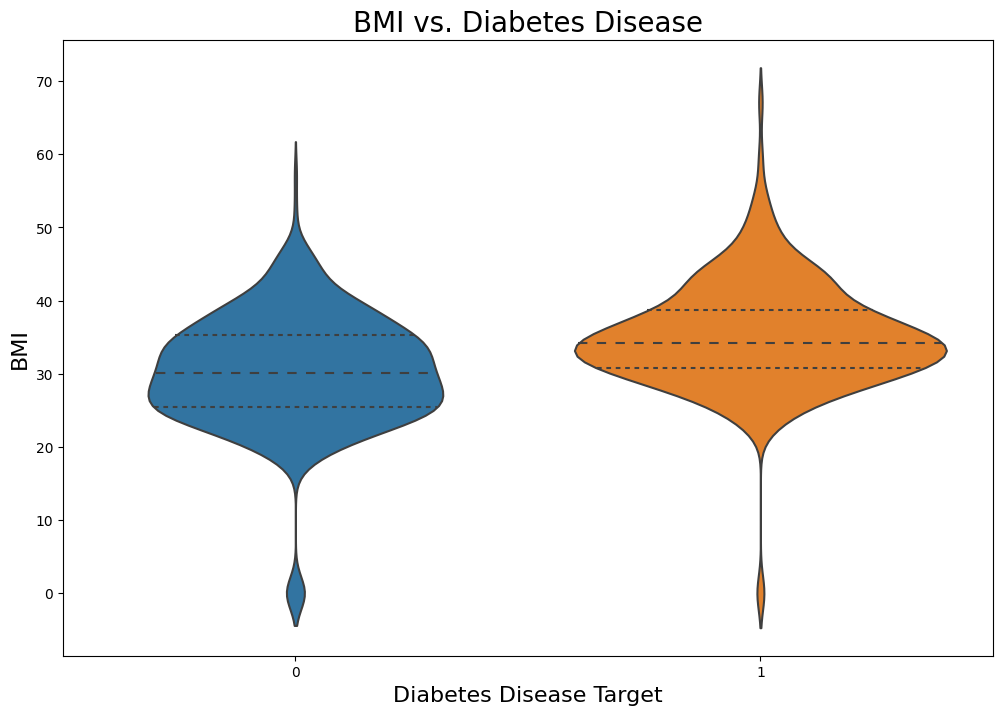

In [30]:
# plot "BMI" using violinplot
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Outcome', y= 'BMI', inner='quartile', data= data )
plt.title("BMI vs. Diabetes Disease",fontsize=20)
plt.xlabel("Diabetes Disease Target", fontsize=16)
plt.ylabel("BMI", fontsize=16)

# **Glucose vs Outcome**

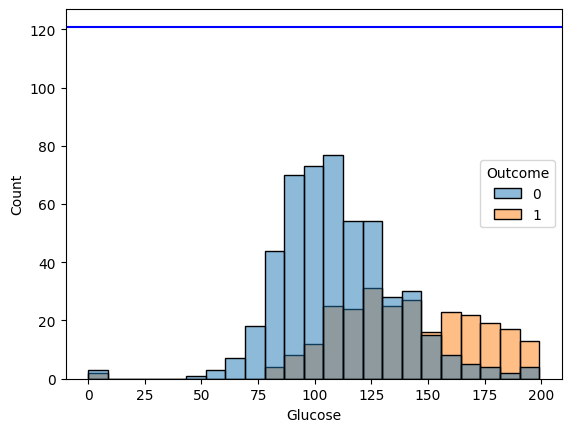

In [31]:
# view the "Glucose" variable in the "Outcome" dataset using histogram
sns.histplot(data=data, x='Glucose', hue='Outcome')
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.axhline(np.mean(data['Glucose']), color='blue', linestyle='solid')
plt.show()

In [32]:
non_diabetic_mean_glu = data_0['Glucose'].mean()
print(f"Average Glucose when patient is diagnosed Non-Diabetes is {non_diabetic_mean_glu}")

Average Glucose when patient is diagnosed Non-Diabetes is 109.98


In [33]:
diabetic_mean_glu = data_1['Glucose'].mean()
print(f"Average Glucose when patient is diagnosed Diabetes is {diabetic_mean_glu}")

Average Glucose when patient is diagnosed Diabetes is 141.25746268656715


**The glucose rate of diabetes patients is much higher than that of non-diabetes patients**

Text(0, 0.5, 'Glucose')

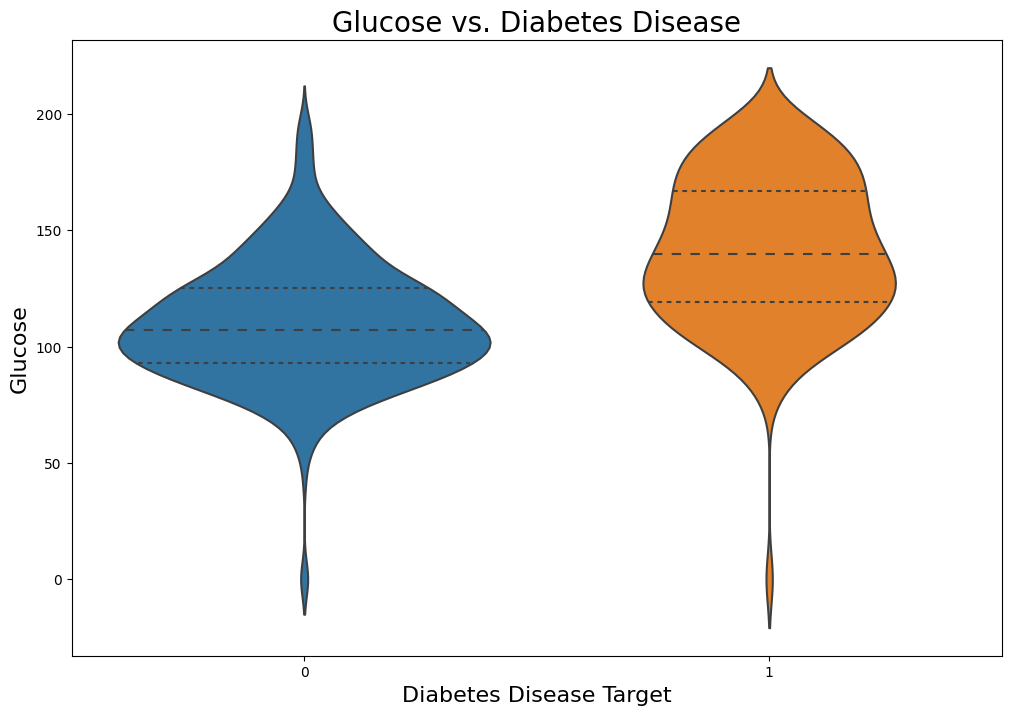

In [34]:
# plot "Glucose" using violinplot
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Outcome', y= 'Glucose', inner='quartile', data= data )
plt.title("Glucose vs. Diabetes Disease",fontsize=20)
plt.xlabel("Diabetes Disease Target", fontsize=16)
plt.ylabel("Glucose", fontsize=16)

# **Pregnacies vs Outcome**

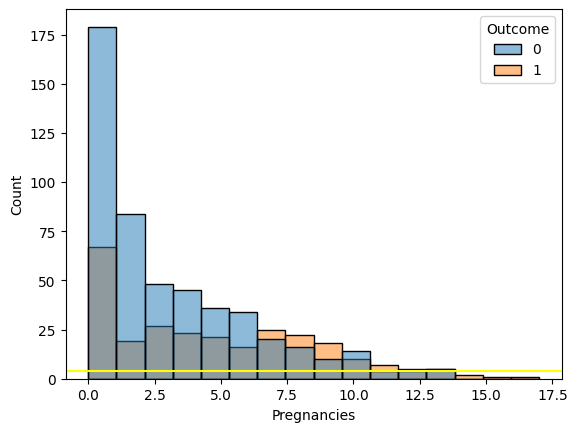

In [35]:
# view the "Pregnancies" variable in the "Outcome" dataset using histogram
sns.histplot(data=data, x='Pregnancies', hue='Outcome')
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.axhline(np.mean(data['Pregnancies']), color='yellow', linestyle='solid')
plt.show()

In [36]:
non_diabetic_mean_preg = data_0['Pregnancies'].mean()
print(f"The average number of pregnancies that influence the diagnosis of Non-Diabetes is {non_diabetic_mean_preg}")

The average number of pregnancies that influence the diagnosis of Non-Diabetes is 3.298


In [37]:
diabetic_mean_preg = data_1['Pregnancies'].mean()
print(f"Average Pregnancies patient diagnosed Diabetes is {diabetic_mean_preg}")

Average Pregnancies patient diagnosed Diabetes is 4.865671641791045


**The higher the number of pregnancies, the higher the incidence of diabetes**.

Text(0, 0.5, 'Pregnancies')

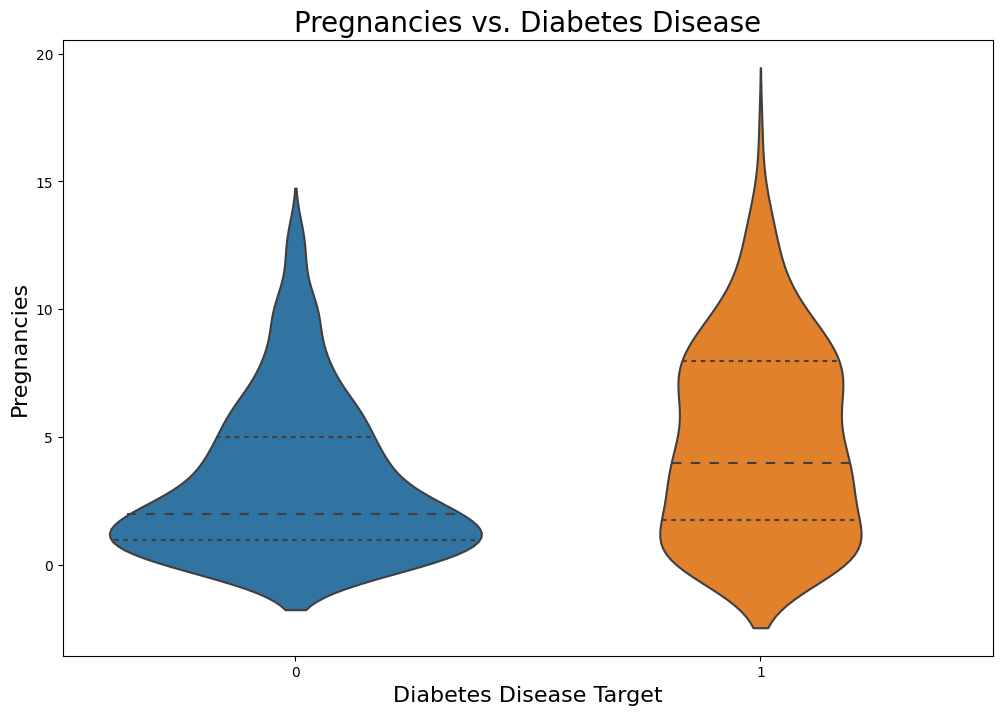

In [38]:
# plot "Pregnancies" using violinplot
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Outcome', y= 'Pregnancies', inner='quartile', data= data )
plt.title("Pregnancies vs. Diabetes Disease",fontsize=20)
plt.xlabel("Diabetes Disease Target", fontsize=16)
plt.ylabel("Pregnancies", fontsize=16)

# **Diabetes Pedigree Function vs Outcome**

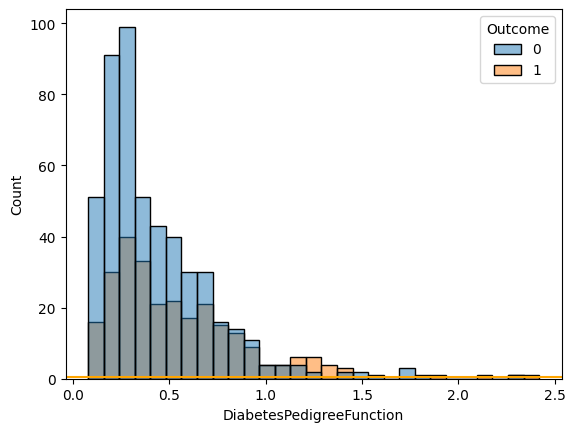

In [39]:
# view the "DiabetesPedigreeFunction" variable in the "Outcome" dataset using histogram
sns.histplot(data=data, x='DiabetesPedigreeFunction', hue='Outcome')
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Count")
plt.axhline(np.mean(data['DiabetesPedigreeFunction']), color='orange', linestyle='solid')
plt.show()

In [40]:
non_diabetic_mean_dpf = data_0['DiabetesPedigreeFunction'].mean()
print(f"The average rate of patients with a genetic history diagnosed with non-diabetes is {non_diabetic_mean_dpf}")

The average rate of patients with a genetic history diagnosed with non-diabetes is 0.42973400000000006


In [41]:
diabetic_mean_dpf = data_1['DiabetesPedigreeFunction'].mean()
print(f"The average rate of patient with a genetic history diagnosed with diabetes is {diabetic_mean_dpf}")

The average rate of patient with a genetic history diagnosed with diabetes is 0.5505


**The patient with a genetic history tend to be diagnosed with diabetes.**

Text(0, 0.5, 'DiabetesPedigreeFunction')

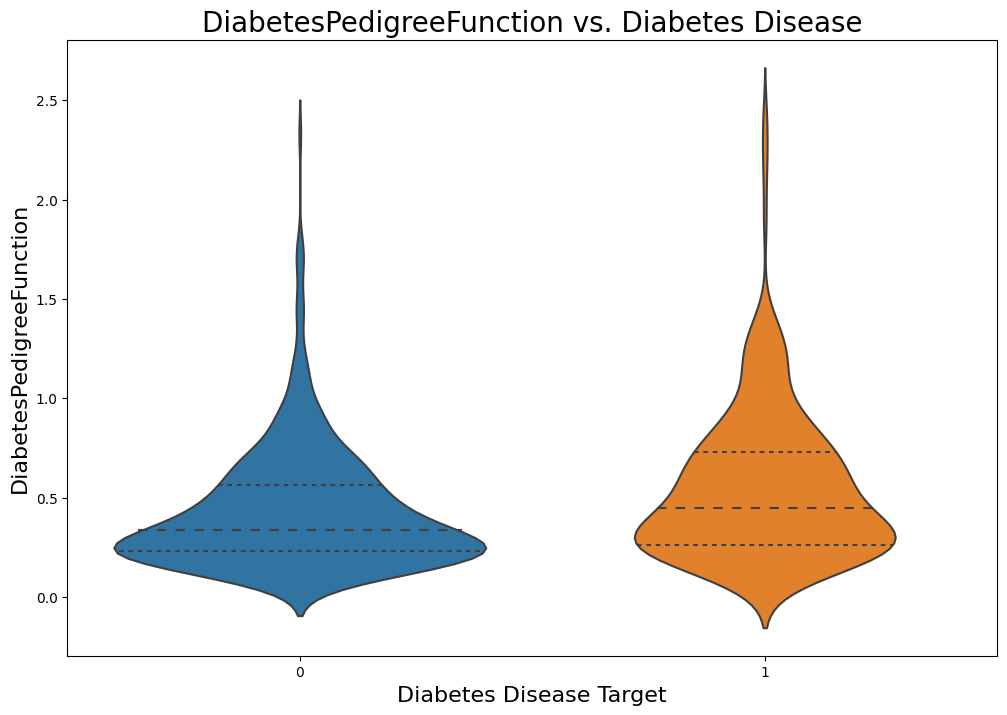

In [42]:
# plot "DiabetesPedigreeFunction" using violinplot
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Outcome', y= 'DiabetesPedigreeFunction', inner='quartile', data= data )
plt.title("DiabetesPedigreeFunction vs. Diabetes Disease",fontsize=20)
plt.xlabel("Diabetes Disease Target", fontsize=16)
plt.ylabel("DiabetesPedigreeFunction", fontsize=16)

# **Insulin vs Outcome**

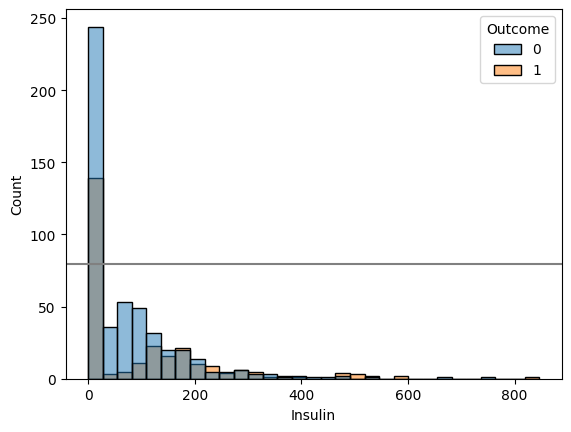

In [43]:
# view the "Insulin" variable in the "Outcome" dataset using histogram
sns.histplot(data=data, x='Insulin', hue='Outcome')
plt.xlabel("Insulin")
plt.ylabel("Count")
plt.axhline(np.mean(data['Insulin']), color='gray', linestyle='solid')
plt.show()

In [44]:
non_diabetic_mean_ins = data_0['Insulin'].mean()
print(f"Average Insulin when patient is diagnosed Non-Diabetes is {non_diabetic_mean_ins}")

Average Insulin when patient is diagnosed Non-Diabetes is 68.792


In [45]:
diabetic_mean_ins = data_1['Insulin'].mean()
print(f"Average Insulin when patient is diagnosed Diabetes is {diabetic_mean_ins}")

Average Insulin when patient is diagnosed Diabetes is 100.33582089552239


**The average insulin rate inside the blood of a diagnosed diabetes patient much higher than non-diabetes patient**

Text(0, 0.5, 'Insulin')

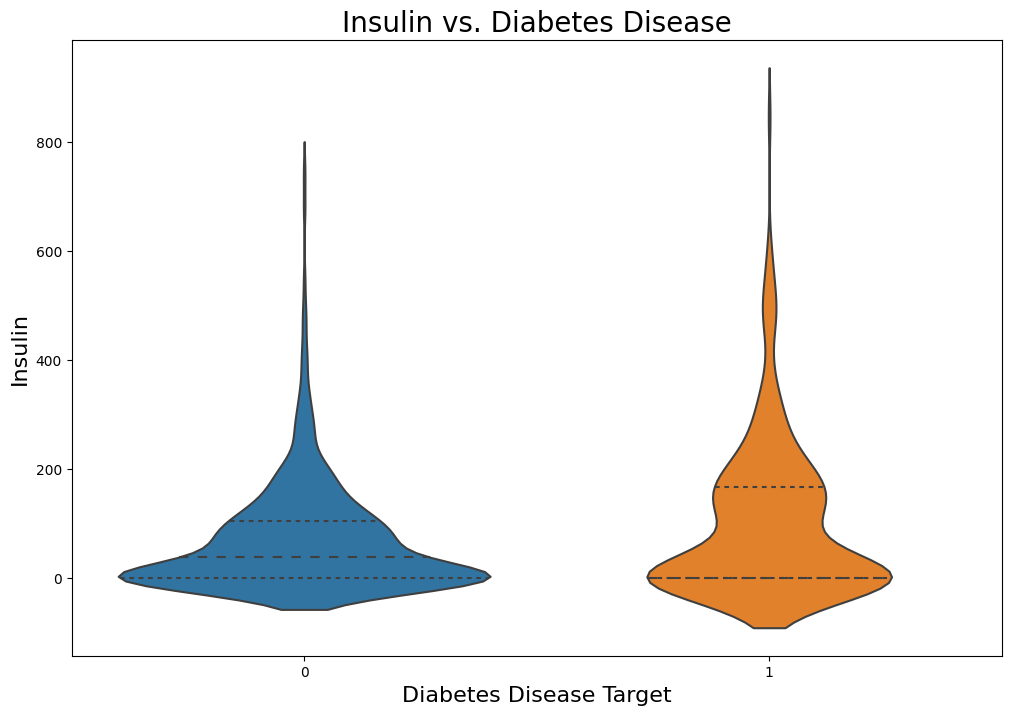

In [46]:
# plot "Insulin" using violinplot
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Outcome', y= 'Insulin', inner='quartile', data= data )
plt.title("Insulin vs. Diabetes Disease",fontsize=20)
plt.xlabel("Diabetes Disease Target", fontsize=16)
plt.ylabel("Insulin", fontsize=16)

# **Blood Pressure vs Outcome**

Selanjutnya kita akan melakukan pengecekan data, apakah target imbalance?

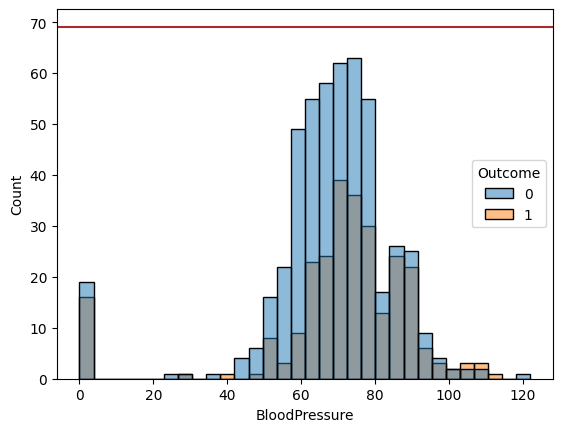

In [47]:
# view the "BloodPressure" variable in the "Outcome" dataset using histogram
sns.histplot(data=data, x='BloodPressure', hue='Outcome')
plt.xlabel("BloodPressure")
plt.ylabel("Count")
plt.axhline(np.mean(data['BloodPressure']), color='brown', linestyle='solid')
plt.show()

In [48]:
non_diabetic_mean_bp = data_0['BloodPressure'].mean()
print(f"Average Blood Pressure when patient is diagnosed Non-Diabetes is {non_diabetic_mean_bp}")

Average Blood Pressure when patient is diagnosed Non-Diabetes is 68.184


In [49]:
diabetic_mean_bp = data_1['BloodPressure'].mean()
print(f"Average Blood Pressure when patient is diagnosed Diabetes is {diabetic_mean_bp}")

Average Blood Pressure when patient is diagnosed Diabetes is 70.82462686567165


The blood pressure of diagnosed diabetes patient higher than non-diabetes patient, although it's not significant

Text(0, 0.5, 'BloodPressure')

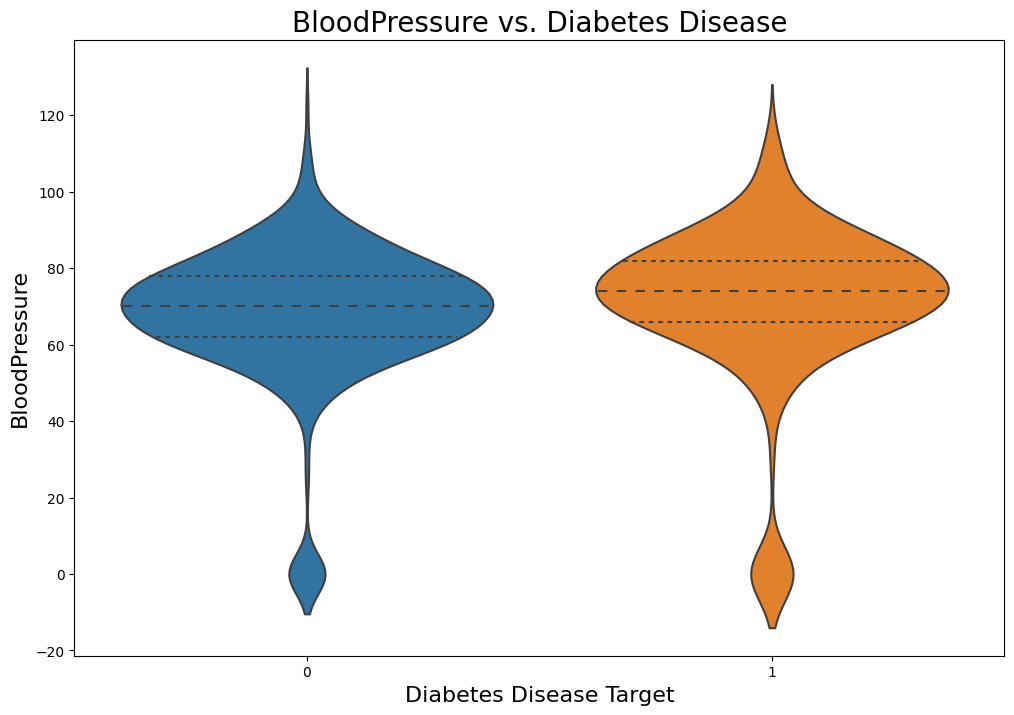

In [50]:
# plot "BloodPressure" using violinplot
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Outcome', y= 'BloodPressure', inner='quartile', data= data )
plt.title("BloodPressure vs. Diabetes Disease",fontsize=20)
plt.xlabel("Diabetes Disease Target", fontsize=16)
plt.ylabel("BloodPressure", fontsize=16)

# *All Features vs Outcome*

In [51]:
#to compare  correlation between a target  and other features in absolute
correlations = data.corr()['Outcome'].drop('Outcome')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations


Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

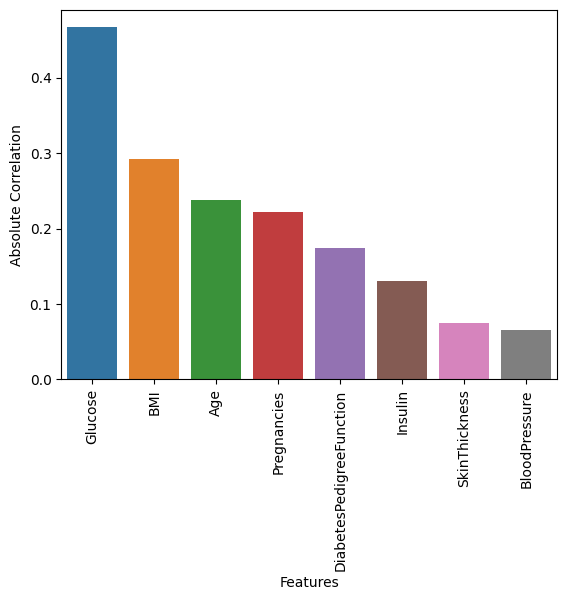

In [52]:
# show bar to compare correlation between a target and other features in absolute
# to be organized and easy to compare

sns.barplot(x=sorted_correlations.index, y=sorted_correlations)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

In [53]:
data_corr = sorted_correlations[:6]
data_corr

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
Name: Outcome, dtype: float64

In [54]:
data_selectfeat = data[['Glucose','BMI', 'Age','Pregnancies','DiabetesPedigreeFunction', 'Insulin' , 'Outcome']]
data_selectfeat

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1
...,...,...,...,...,...,...,...
763,101,32.9,63,10,0.171,180,0
764,122,36.8,27,2,0.340,0,0
765,121,26.2,30,5,0.245,112,0
766,126,30.1,47,1,0.349,0,1


In [55]:
# Calculate the interquartile range (IQR) for each column
Q1 = data_selectfeat.quantile(0.25)
Q3 = data_selectfeat.quantile(0.75)
IQR = Q3 - Q1


# Identify  dataoutliers
outliers = data_selectfeat[((data_selectfeat < (Q1 - 1.5 * IQR)) | (data_selectfeat > (Q3 + 1.5 * IQR))).any(axis=1)]

# drop the outliers from the data
train_clean = data_selectfeat.drop(outliers.index )

train_clean

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
5,116,25.6,30,5,0.201,0,0
...,...,...,...,...,...,...,...
763,101,32.9,63,10,0.171,180,0
764,122,36.8,27,2,0.340,0,0
765,121,26.2,30,5,0.245,112,0
766,126,30.1,47,1,0.349,0,1


Text(0.5, 1.0, 'Correlation data ')

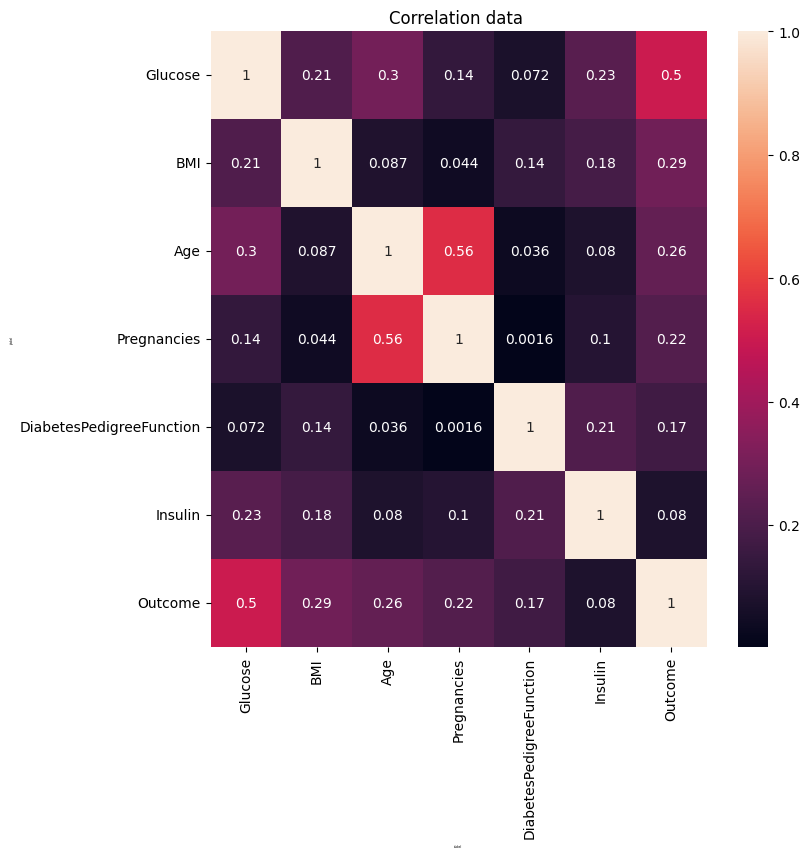

In [56]:
#visualizing the correlation between the variables in the data
plt.figure(figsize=(8,8))
sns.heatmap (np.abs(train_clean.corr()), annot = True)
plt.xlabel('xlabel', fontsize = 2)
plt.ylabel('ylabel', fontsize = 2)
plt.title ("Correlation data " , fontsize = 12 )

# **Standard Scaler**

In [57]:
# split data
X= train_clean.drop(columns=['Outcome']) # data
y= train_clean['Outcome']  #target

In [58]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [59]:
X

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,0.970960,0.236202,1.560567,0.673188,0.793738,-0.797901
1,-1.177162,-0.841035,-0.158984,-0.851438,-0.307782,-0.797901
2,2.164362,-1.348875,-0.068481,1.283038,0.973334,-0.797901
3,-1.040774,-0.610198,-1.064011,-0.851438,-1.042129,0.392169
4,-0.120150,-0.994926,-0.249487,0.368263,-0.906434,-0.797901
...,...,...,...,...,...,...
669,-0.631607,0.128478,2.737102,1.892889,-1.026165,1.480957
670,0.084434,0.728653,-0.520995,-0.546513,-0.351683,-0.797901
671,0.050336,-0.902591,-0.249487,0.368263,-0.730830,0.620055
672,0.220822,-0.302416,1.289059,-0.851438,-0.315764,-0.797901


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42)

In [62]:
# Save data for modelling
train_clean.to_csv('diabetes_clean.csv')